In [1]:
library(SynchWave, warn.conflicts = F, quietly = T)

Spam version 2.7-0 (2021-06-25) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 



In [2]:
n <- 128
L <- 30
dx <- L/n
x <- seq(-L/2,L/2,dx)
f <- cos(x) * exp(-x^2/25) # Function
df <- -(sin(x) * exp(-x^2/25) + (2/25)*x*f) # Derivative

In [3]:
## Approximate derivative using finite difference
dfFD <- rep(0, length(df))
for (kappa in 1:(length(df)-1)) {
    dfFD[kappa] = (f[kappa+1]-f[kappa])/dx
    }
     
dfFD[length(dfFD)] = dfFD[length(dfFD)-1]

In [4]:
## Derivative using FFT (spectral derivative)
fhat = fft(f)
kappa = (2*pi/L)*seq(-n/2, n/2, by=1)
kappa = fftshift(kappa) # Re-order fft frequencies
dfhat = kappa * fhat * (1i)
dfFFT = Re(fft(dfhat, inverse=TRUE))/length(dfhat)

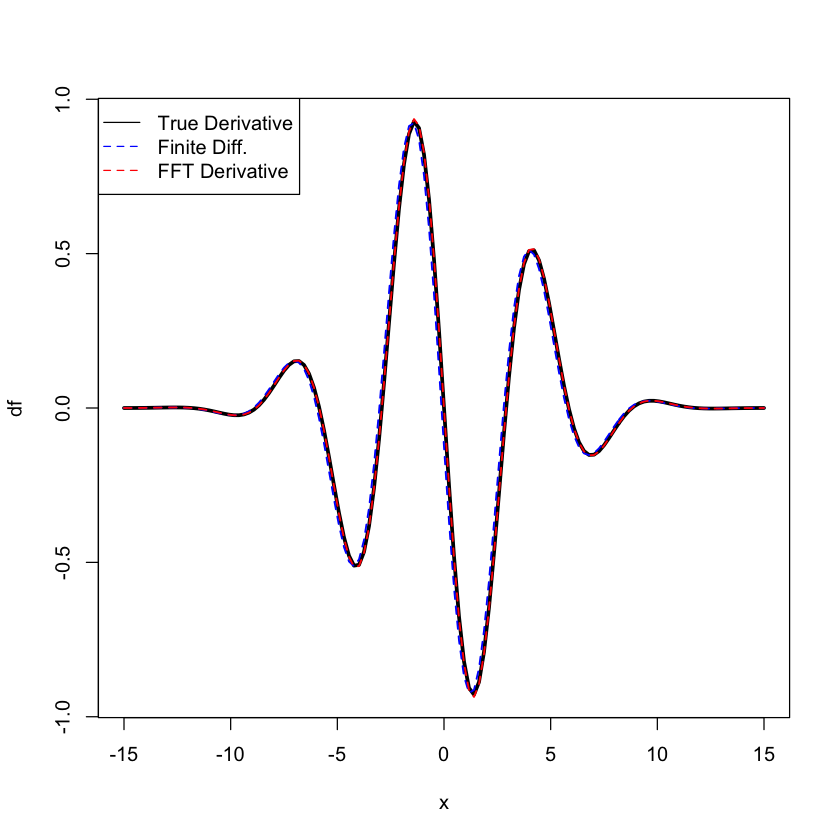

In [5]:
plot(x, df, col="black", lwd=3, type="l")
lines(x, dfFD, col="blue", lty=2, lwd=1.5)
lines(x, dfFFT, col="red", lty=2, lwd=1.5)
legend("topleft", legend=c("True Derivative", "Finite Diff.", "FFT Derivative"), 
       col=c("black", "blue", "red"), lwd=1, lty=c(1,2,2), 
       pch=c(NA,NA, NA))